# Final Exercise
This is the final exercise in our Into to Machine Learning Course.\
207027053 - Gil Yair Yamin

First thing we need to do is of course import all libraries we will be using:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

We have here a csv file with data about cancer patients.
Using numpy, lets import the data from the csv we were given.

In [2]:
raw_data = np.loadtxt("cancer_data.csv", dtype=np.float64, delimiter=",")

We need to normalize our data to continue:

In [3]:
def normalize(raw_data):
    res = np.zeros_like(raw_data, dtype=np.float64)
    ExpectedArr = np.zeros(shape=(len(raw_data[0])), dtype=np.float64)
    DeviationArr = np.zeros(shape=(len(raw_data[0])), dtype=np.float64)

    for i in range(len(raw_data[0])):
        Expected = raw_data[:, i].mean()

        shiftedCol = raw_data[:, i] - Expected
        Deviation = np.sqrt(np.square(shiftedCol).mean())

        res[:, i] = shiftedCol / Deviation if Deviation > 0 else shiftedCol

        ExpectedArr[i] = Expected
        DeviationArr[i] = Deviation

    return res, ExpectedArr, DeviationArr

Now we'll create the matrix X, and vector y

In [4]:
normalized_data, expected, deviation = normalize(raw_data)

ones = np.ones((len(normalized_data), 1), dtype=np.float64)
X = np.concatenate((ones, normalized_data[:, :-1]), axis=1, dtype=np.float64)

y = normalized_data[:, -1]

Let's define a function that recieves the vector $\Theta$ and a vector $x$, and returns the result of $h_\Theta(x)$\
We are assuming that $x[0] = 1$.

In [5]:
def calculateHTheta(theta: np.ndarray, x: np.ndarray):
    return (theta * x).sum()

Let's define a function that recieves a vector $\Theta$, the matrix $X$, and the vector $y$, and returns the value of $J(\Theta)$.

In [6]:
def calculateJ(theta: np.ndarray, X: np.ndarray, y: np.ndarray):
    return np.square(np.linalg.norm(X.dot(theta) - y)) / (2 * len(y))

Let's define a function that recieves a vector $\Theta$, the matrix $X$, and the vector $y$, and returns the value of $\triangledown J(\Theta)$.

In [7]:
def calculateGradient(theta: np.ndarray, X: np.ndarray, y: np.ndarray):
    return X.transpose().dot((X.dot(theta) - y)) / len(y)

Let's write the Gradient Decent function here.\
We must recieve the data, including X and y, and we also must recieve parameters for our 3 ending conditions:
$$||\Theta^{(k + 1)} - \Theta^{(k)}|| < \epsilon$$
$$||J(\Theta^{(k + 1)}) - J(\Theta^{(k)}))|| < \delta $$
$$k + 1 < M $$

In [8]:
D_E = 0.000001
D_M = 10000


def GradientDecent(X, y, alpha, M=D_M, epsilon=D_E, delta=D_E):

    theta = [np.zeros((len(X[0])))]
    J = [calculateJ(theta[0], X, y)]

    for i in range(M):
        theta.append(theta[i] - calculateGradient(theta[i], X, y) * alpha)
        J.append(calculateJ(theta[i + 1], X, y))

        if np.linalg.norm(theta[i + 1] - theta[i]) < epsilon:
            break

        if np.abs(J[i + 1] - J[i]) < delta:
            break

    return theta, J

Let's write the batch gradient decent function here.\
Notice, I created a function "createBatchIndexList" to create an index list with roughly the same batch size for every cell.\
Since the number of data points may not be divisible by b.

In [9]:
def createBatchIndexList(length, b):
    amount = math.floor(length / b)
    if amount <= 1:
        return [length]

    sizes = [b for _ in range(amount)]
    leftOver = length % b

    while leftOver > 0:
        for i in range(amount):
            sizes[i] += 1
            leftOver -= 1
            if leftOver <= 0:
                break

    indexes = [sizes[0]]
    for i in range(1, amount):
        indexes.append(sizes[i] + indexes[i - 1])

    return indexes, amount - 1


def batchGradientDecent(X, y, alpha, M=D_M, epsilon=D_E, delta=D_E, b=64):
    length = len(X)
    indexes, amount = createBatchIndexList(length, b)

    x_batch = [X[indexes[i] : indexes[i + 1]] for i in range(amount)]
    y_batch = [y[indexes[i] : indexes[i + 1]] for i in range(amount)]

    theta = [np.zeros((len(X[0])))]
    J = [calculateJ(theta[0], x_batch[0], y_batch[0])]

    for i in range(M):
        Xb = x_batch[i % amount]
        yb = y_batch[i % amount]

        theta.append(theta[i] - calculateGradient(theta[i], Xb, yb) * alpha)
        J.append(calculateJ(theta[i + 1], X, y))

        if np.linalg.norm(theta[i + 1] - theta[i]) < epsilon:
            break

        if np.abs(J[i + 1] - J[i]) < delta:
            break

    return theta, J

Here I write a function that will generate the matplotlib figure in order to draw the result.

In [10]:
def createGraphFromData(data):
    df = pd.DataFrame([data], index=["data"]).transpose()
    fig = plt.figure()
    ax1 = fig.add_axes([0, 0, 3, 1])
    ax1.plot(df["data"])

    return fig

Let's defube our $M$, $\epsilon$, $\delta$, and all $\alpha$ values here.

In [11]:
epsilon = 0.0000001
delta = epsilon
M = 10000
alpha = 0.1

Let's create multiple tests for regular Gradient Decent.

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\520272625.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(J[i + 1] - J[i]) < delta:
C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\397952352.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


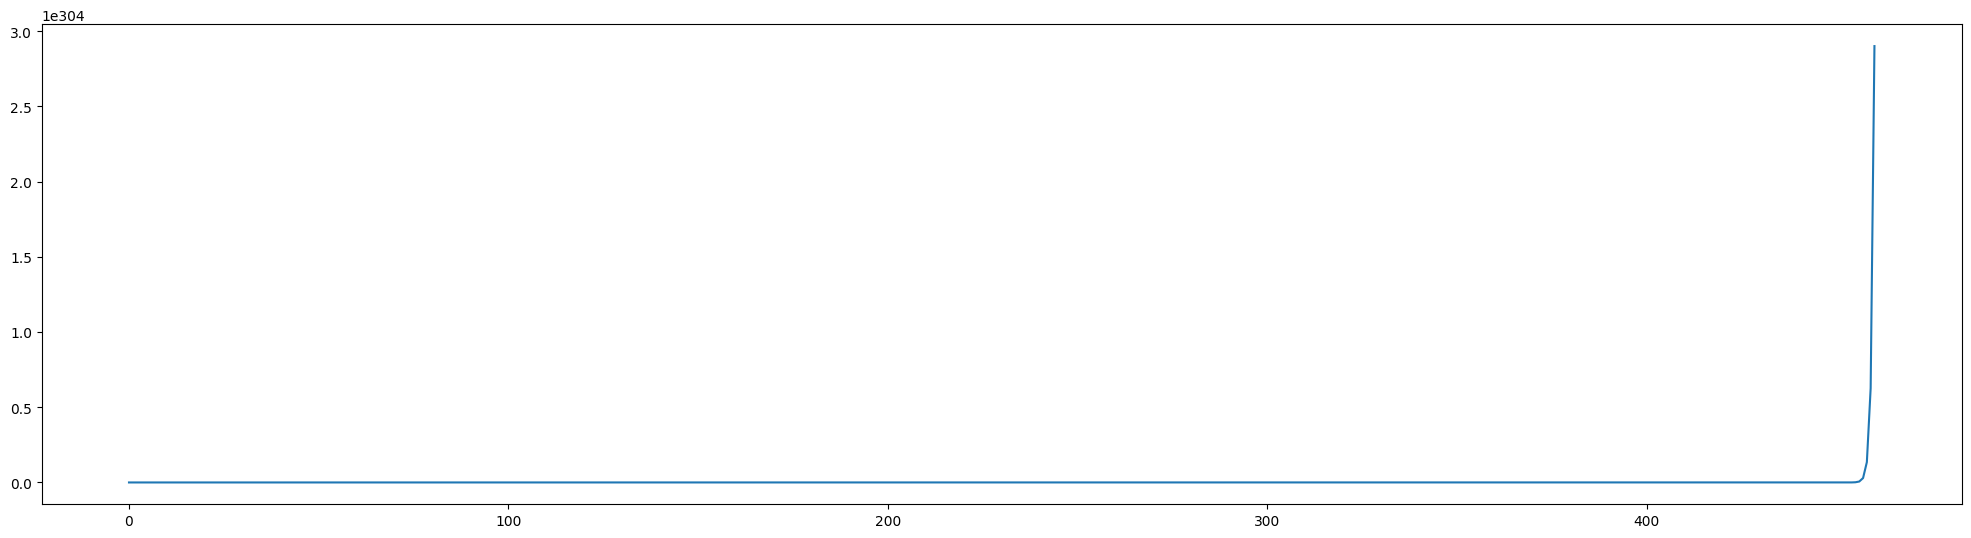

In [12]:
theta, J = GradientDecent(X, y, alpha=1, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\3352737829.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


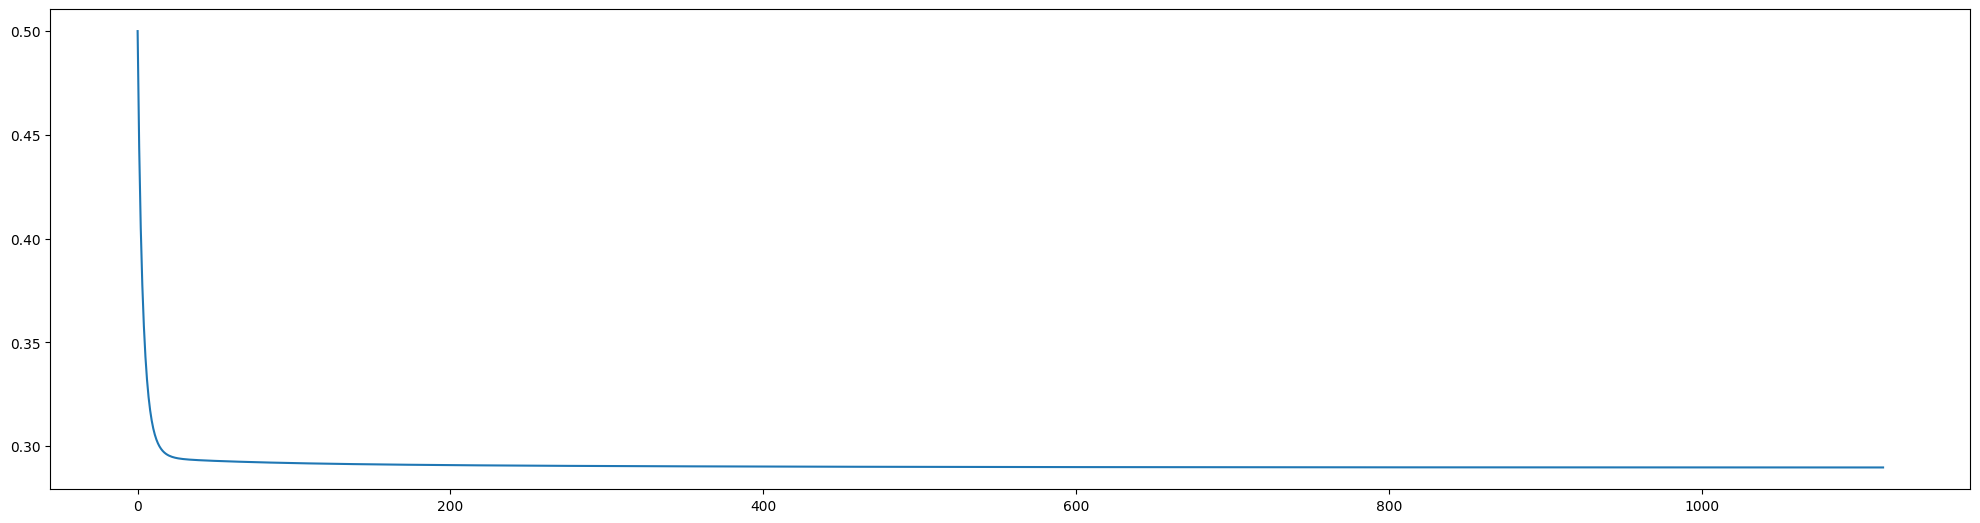

In [13]:
theta, J = GradientDecent(X, y, alpha=0.1, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\3883987634.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


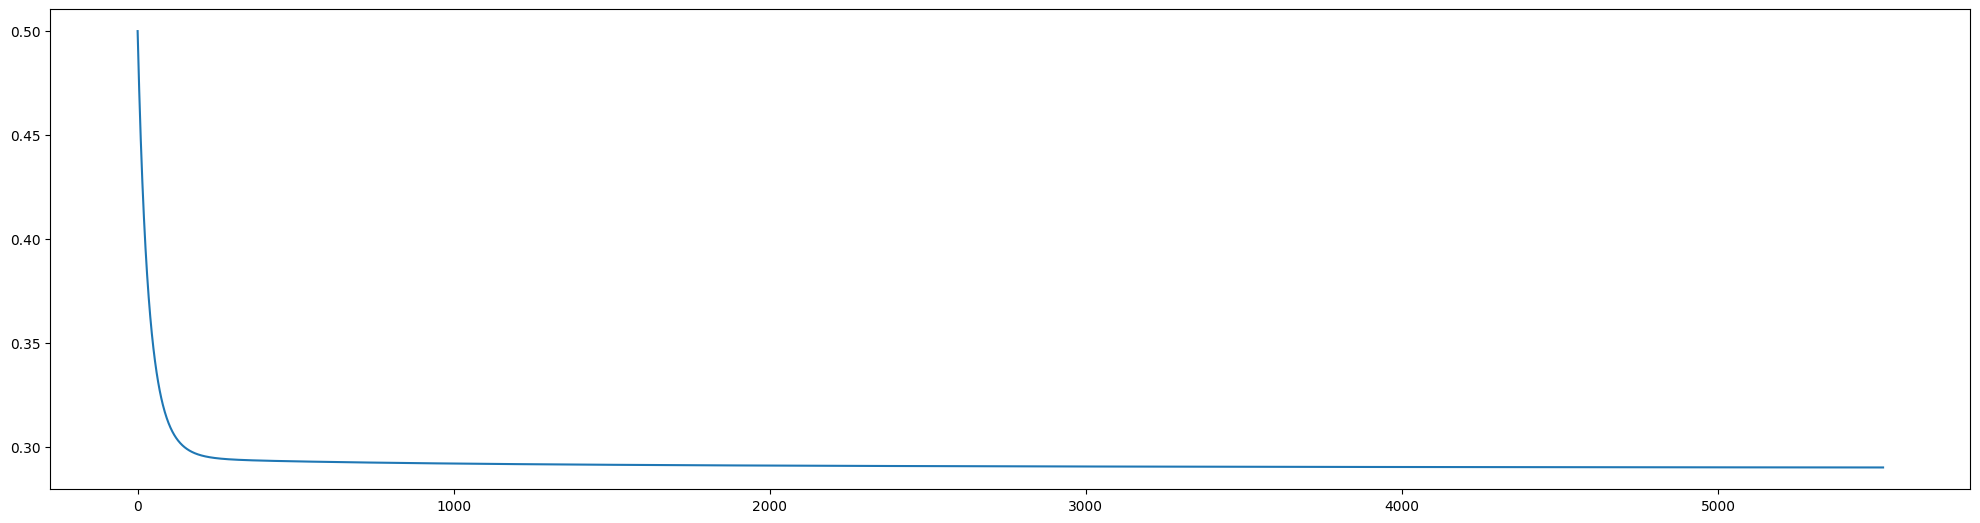

In [14]:
theta, J = GradientDecent(X, y, alpha=0.01, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)
fig.show()
accurate_theta = theta[-1]

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\4022557133.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


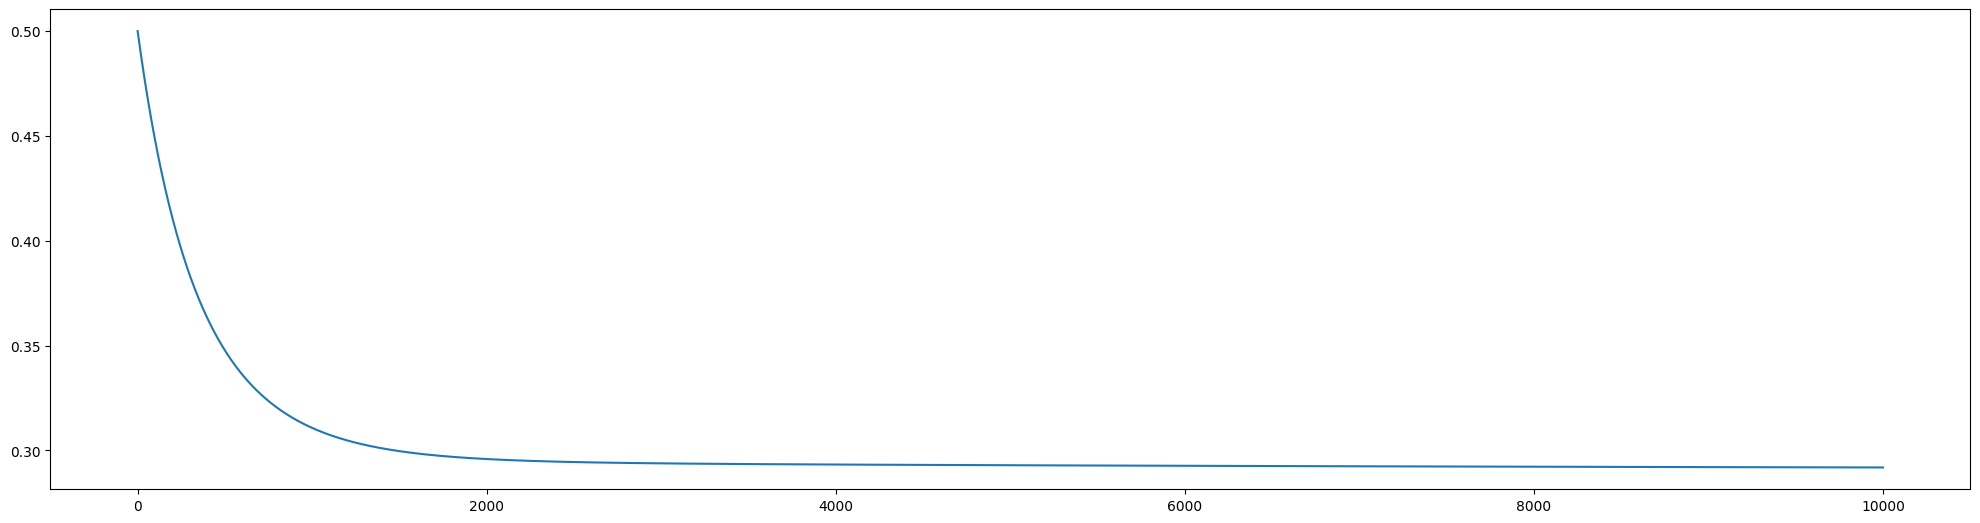

In [15]:
theta, J = GradientDecent(X, y, alpha=0.001, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\2901201593.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


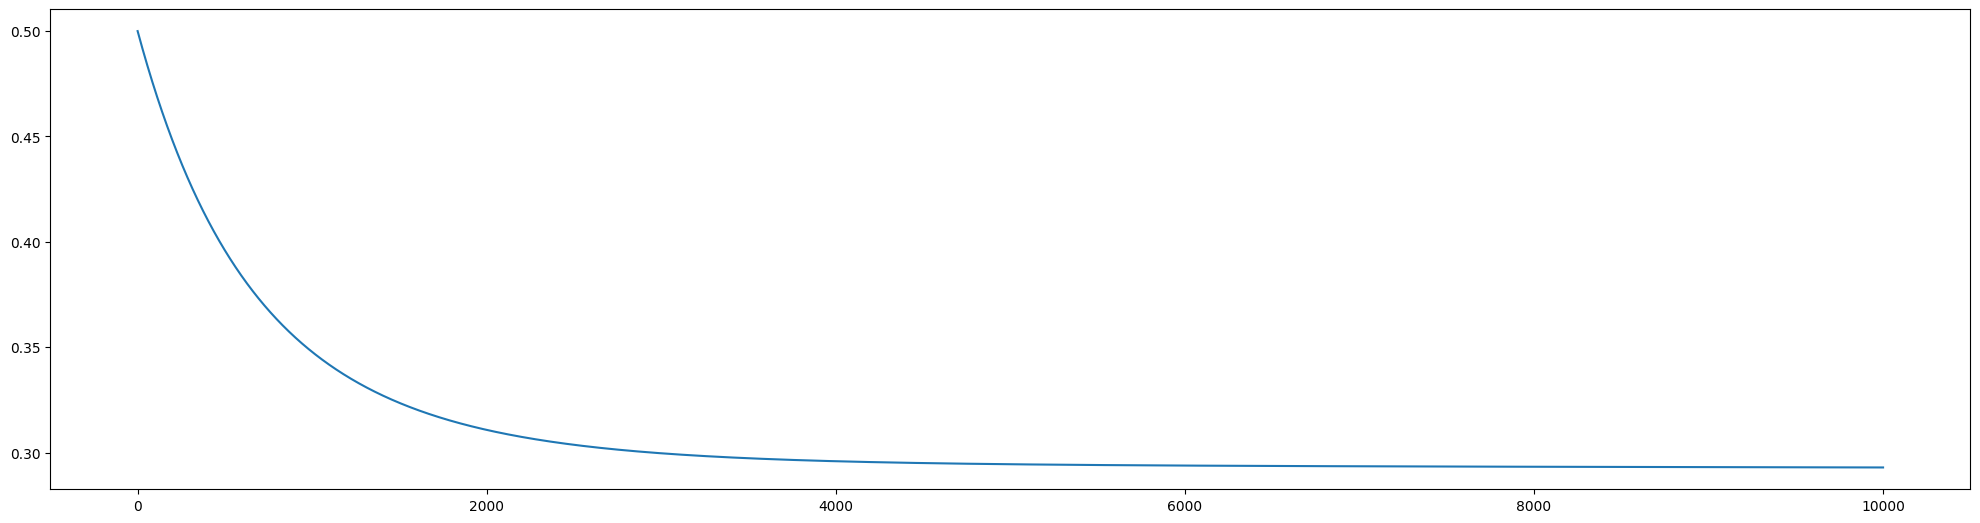

In [16]:
theta, J = GradientDecent(X, y, alpha=0.0005, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)
fig.show()

Let's use our batchGradientDecent function to generate data.\
Then, plot it in a graph.

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\381686629.py:43: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(J[i + 1] - J[i]) < delta:
C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\3282997270.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


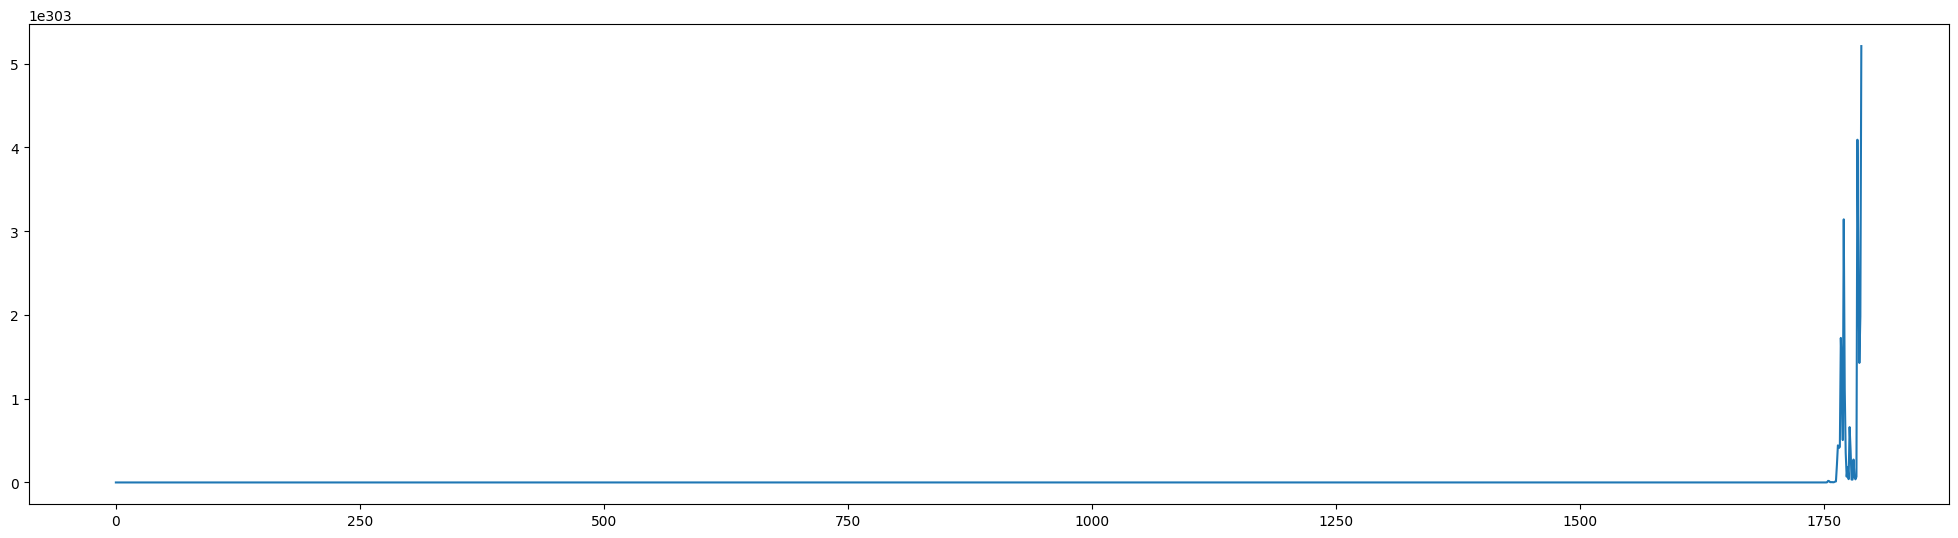

In [17]:
theta, J = batchGradientDecent(
    X, y, alpha=1, epsilon=epsilon, delta=delta, M=M, b=64
)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\1157764234.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


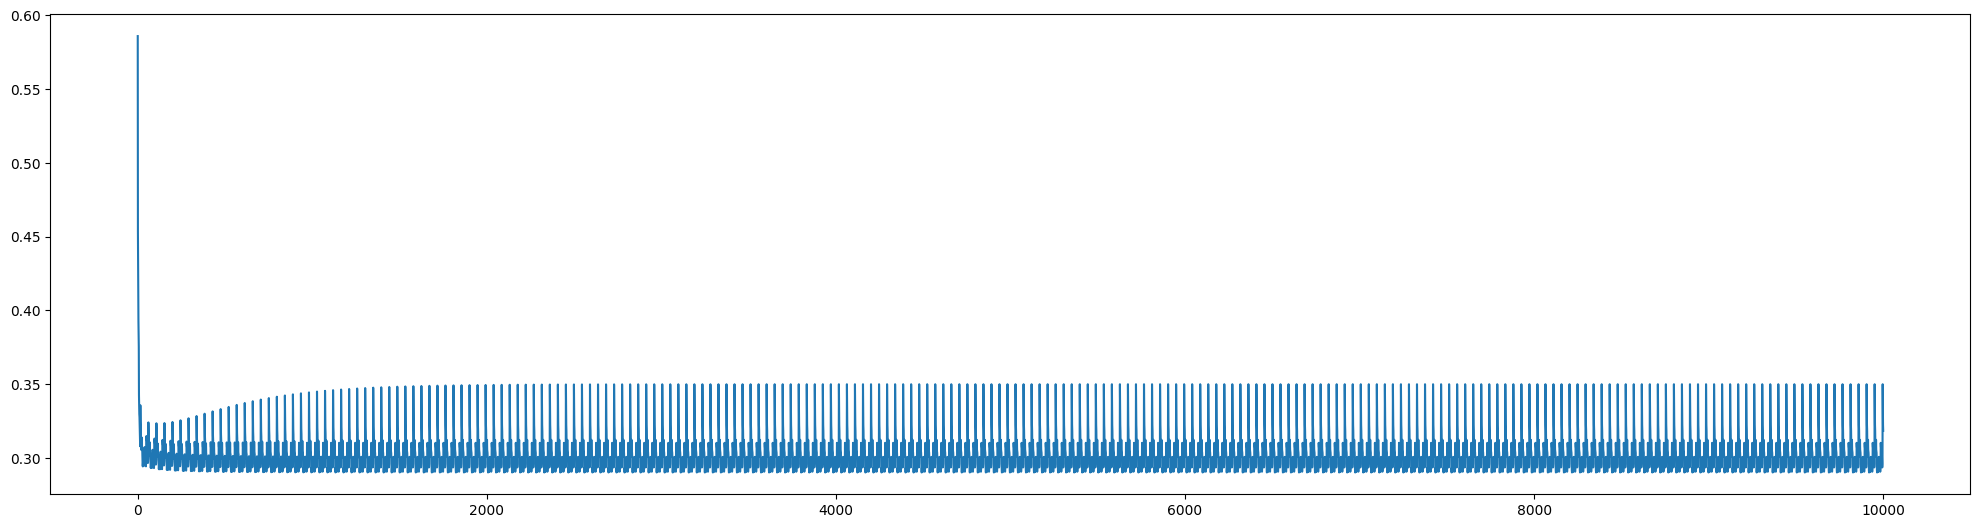

In [18]:
theta, J = batchGradientDecent(
    X, y, alpha=0.1, epsilon=epsilon, delta=delta, M=M, b=64
)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\2763561888.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


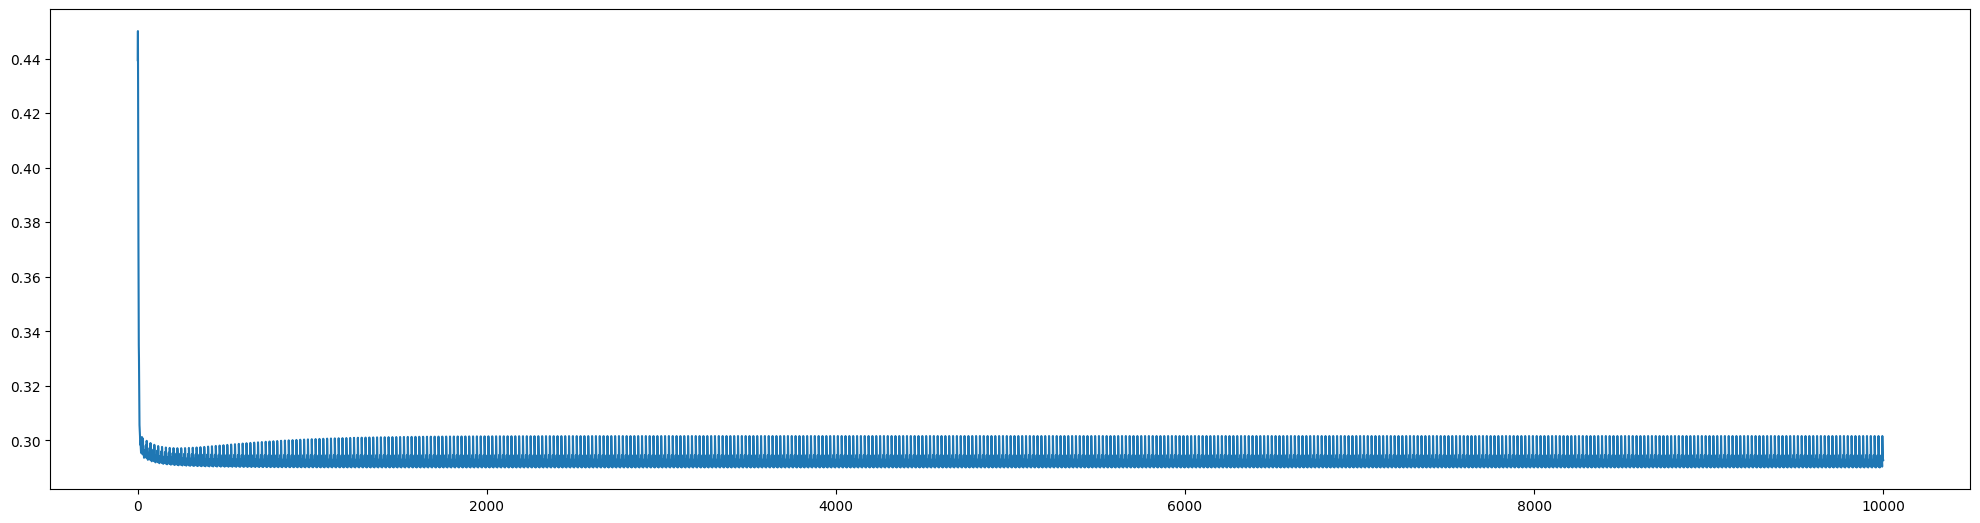

In [19]:
theta, J = batchGradientDecent(
    X, y, alpha=0.1, epsilon=epsilon, delta=delta, M=M, b=128
)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\2230343132.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


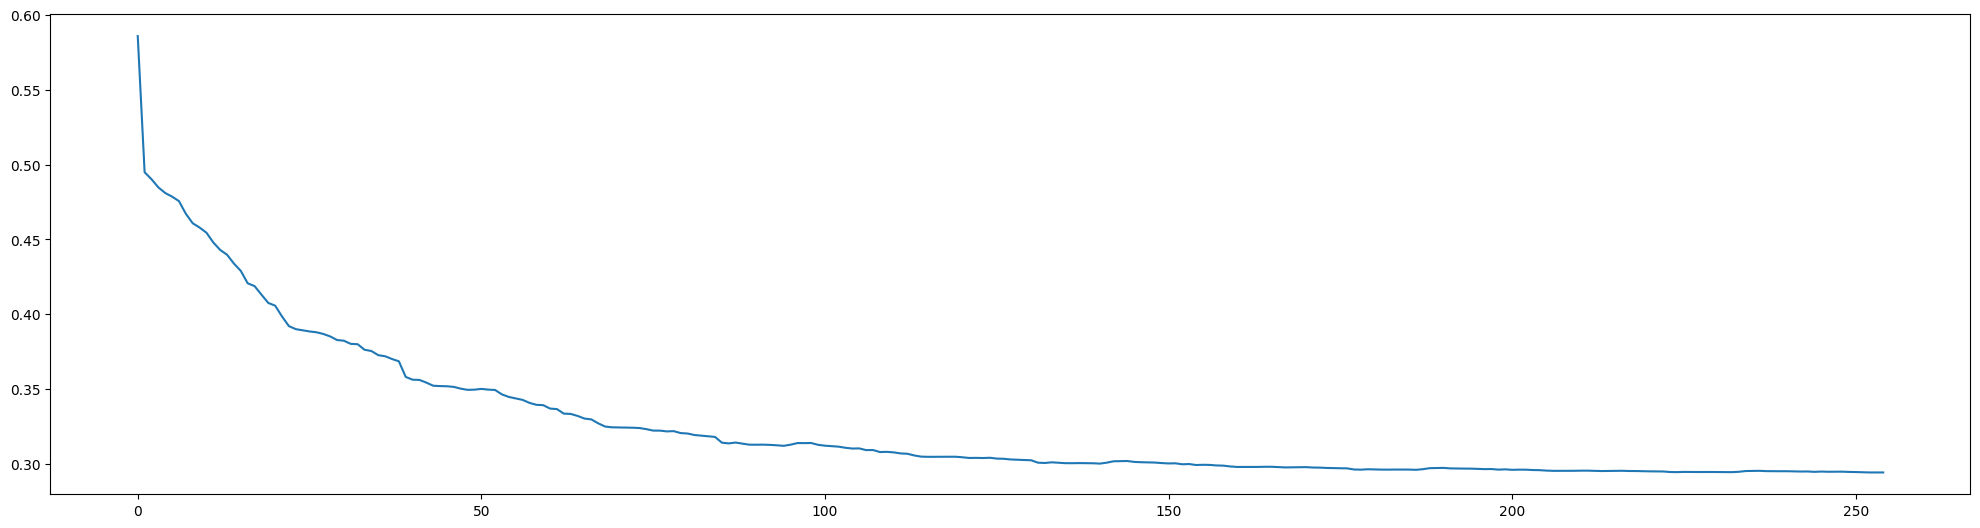

In [20]:
theta, J = batchGradientDecent(
    X, y, alpha=0.01, epsilon=epsilon, delta=delta, M=M, b=64
)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\2261530510.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


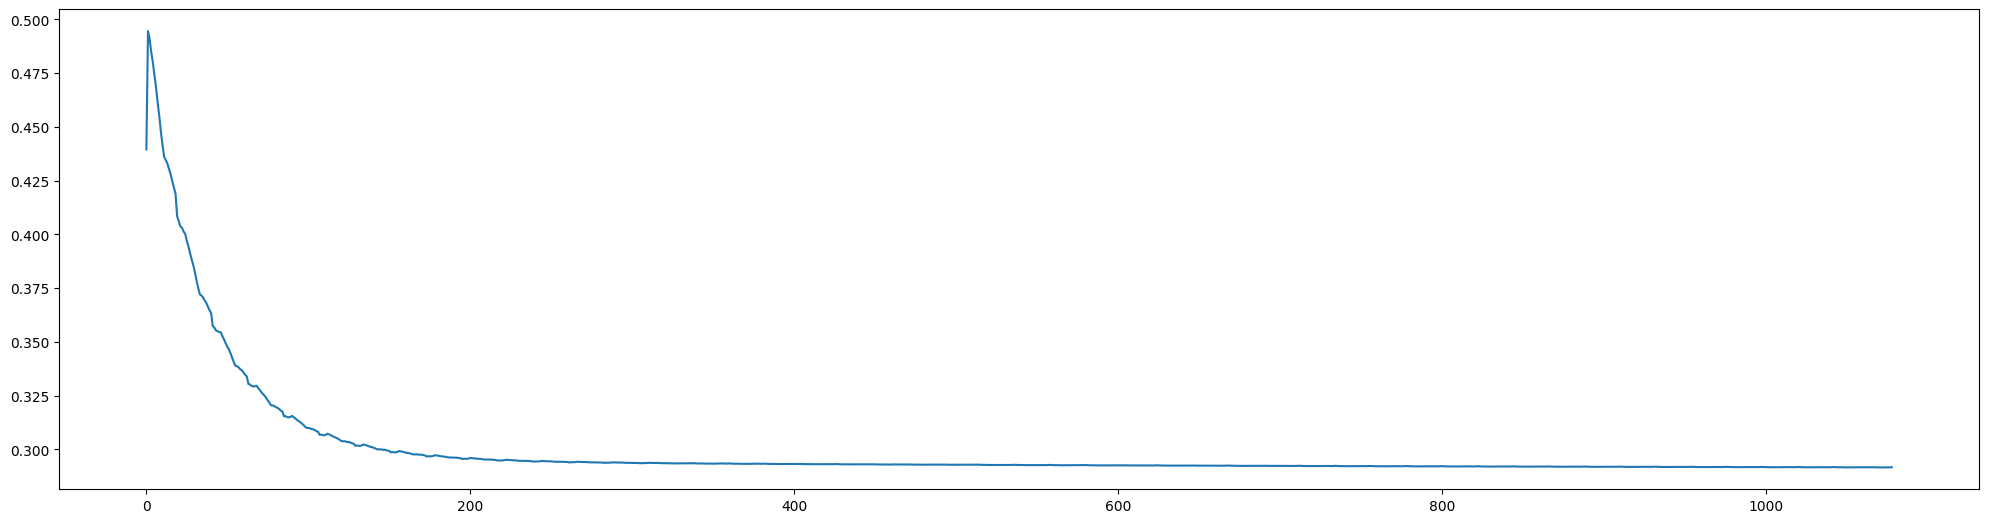

In [21]:
theta, J = batchGradientDecent(
    X, y, alpha=0.01, epsilon=epsilon, delta=delta, M=M, b=128
)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\3002141754.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


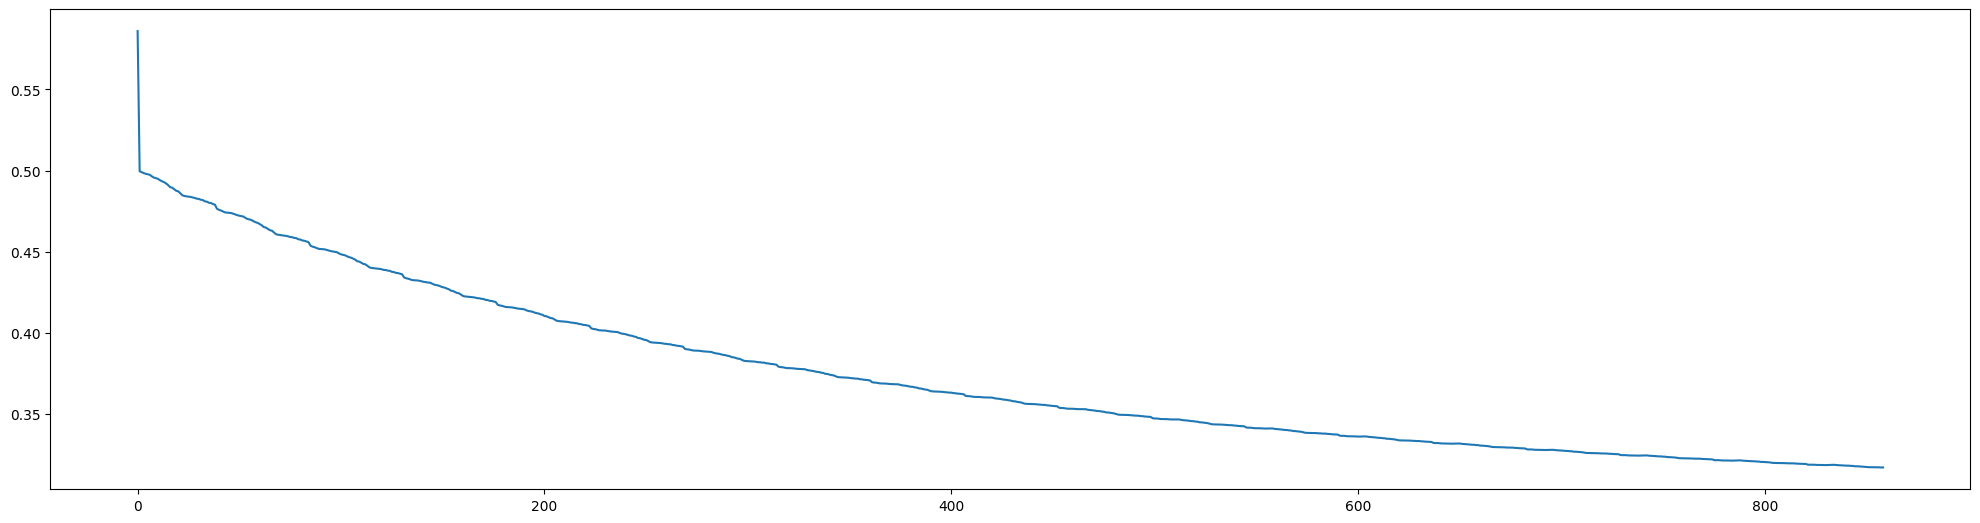

In [22]:
theta, J = batchGradientDecent(
    X, y, alpha=0.001, epsilon=epsilon, delta=delta, M=M, b=64
)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\1003133945.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


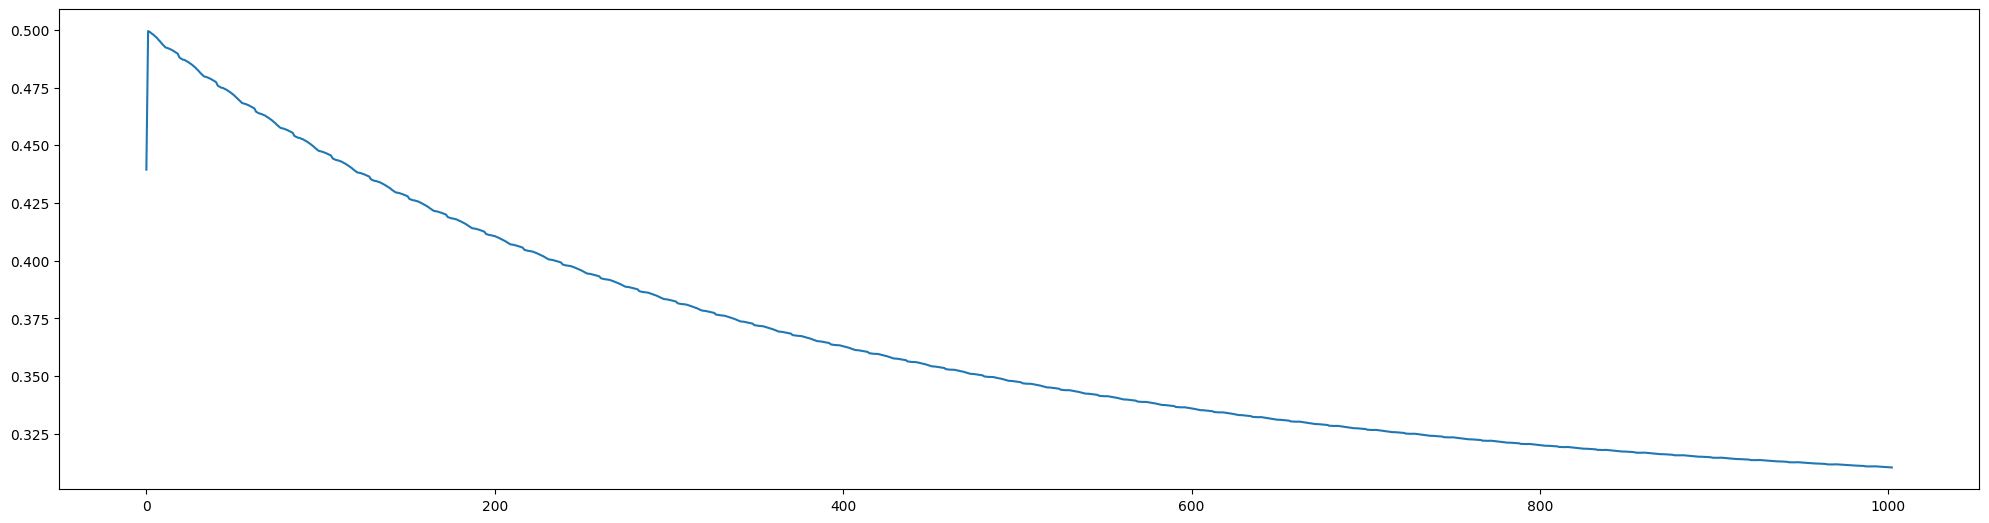

In [23]:
theta, J = batchGradientDecent(
    X, y, alpha=0.001, epsilon=epsilon, delta=delta, M=M, b=128
)
fig = createGraphFromData(J)
fig.show()

Some conclusions from running those graphs multiple times:
1. When $\alpha=1$, both gradient decents do not converge.
2. It seems that in both cases, the smaller the $\alpha$, the faster it converges.
3. It seems that it takes about the same amount of iterations to converge at around $\alpha=0.01$ for both functions.
4. It seems that if $\alpha$ is too large, the batch decent will not converge and instead will start showing a pattern.

Now let's create SVD.

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\788395460.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


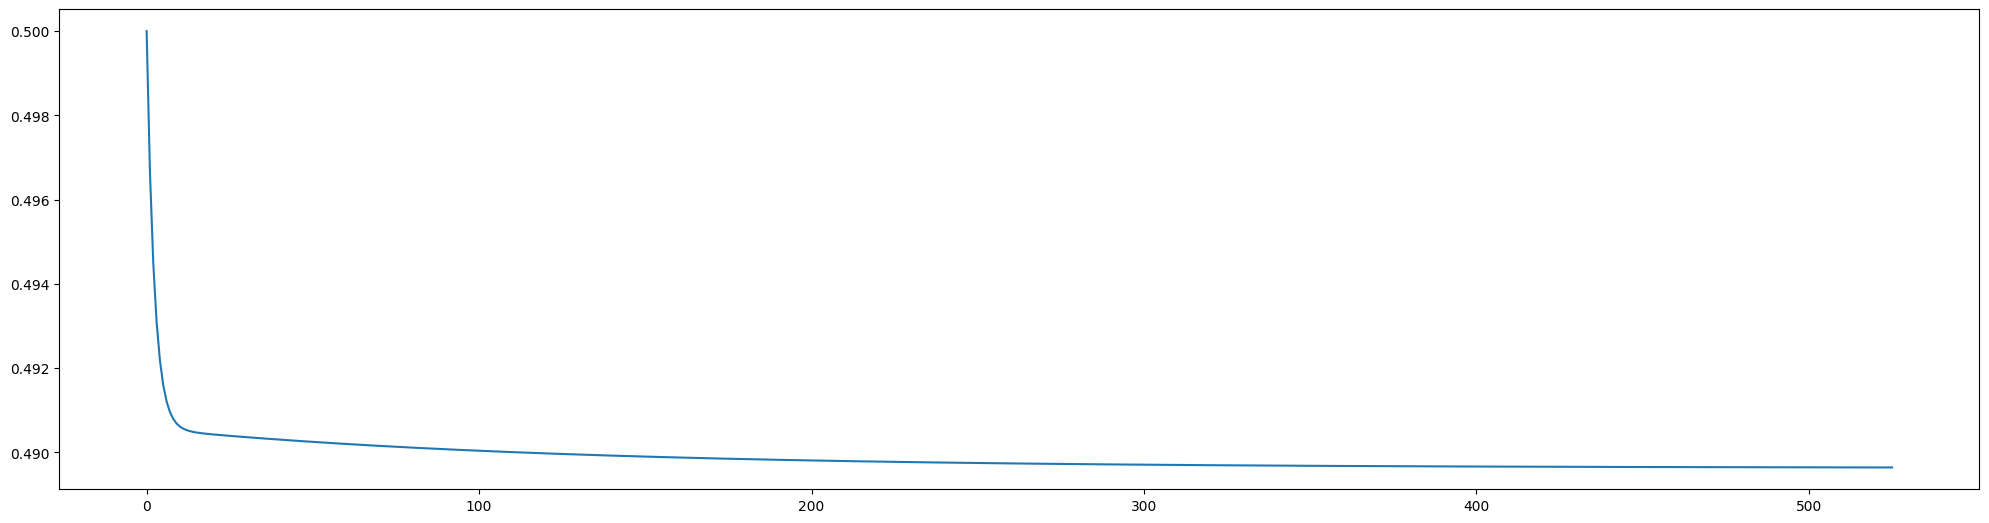

In [24]:
dim = 3

U, s, Vt = np.linalg.svd(raw_data[:, :-1], full_matrices=False)
reduce_data = U[:, :dim].dot(np.diag(s[:dim])).dot(Vt[:dim, :dim])
normalized_rd, reduced_expected, reduced_deviation = normalize(reduce_data)
reduced_X = np.concatenate((ones, normalized_rd[:, :-1]), axis=1, dtype=np.float64)

theta, J = GradientDecent(reduced_X, y, alpha=0.1, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)
fig.show()

C:\Users\gilgo\AppData\Local\Temp\ipykernel_10156\3724458603.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


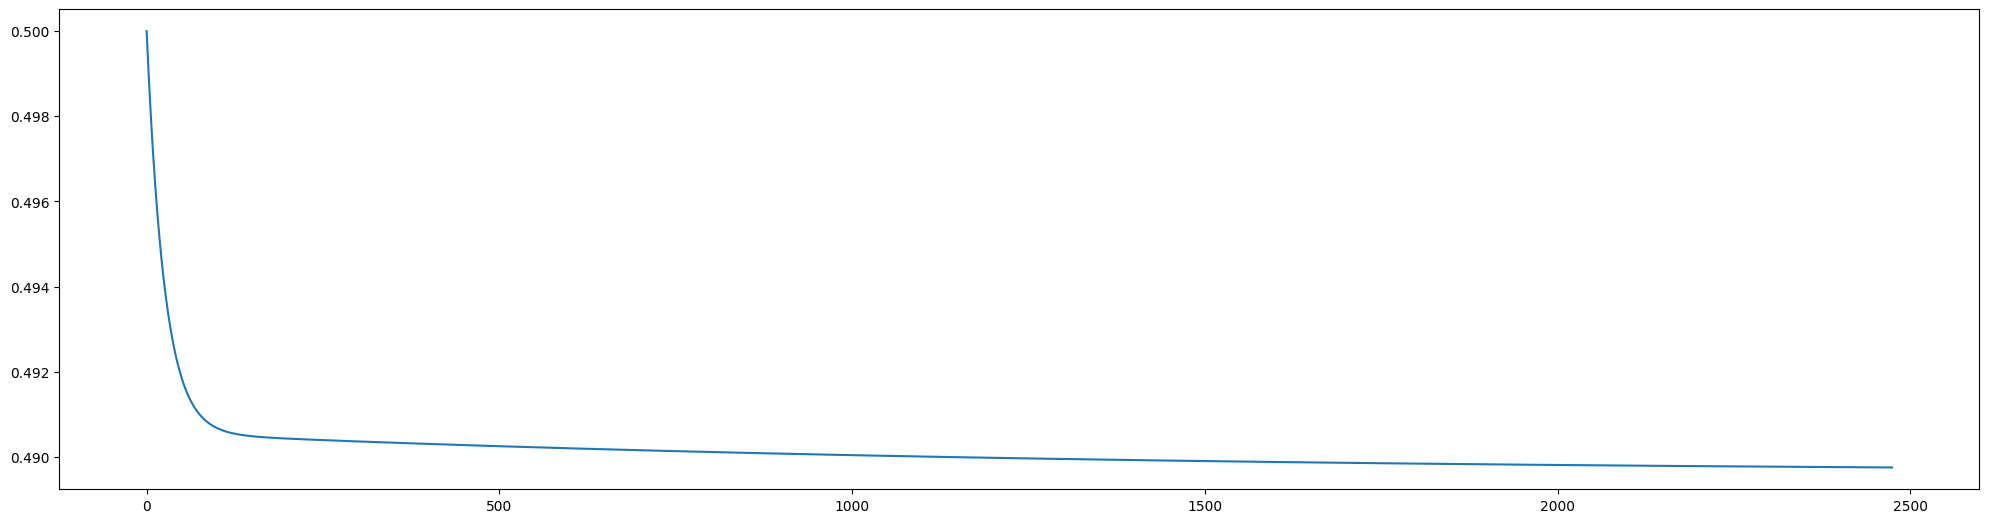

In [25]:
theta, J = GradientDecent(reduced_X, y, alpha=0.01, epsilon=epsilon, delta=delta, M=M)
fig = createGraphFromData(J)

fig.show()